All Rows and Columns of the CPI Data:
                  CPI_Value
observation_date           
1947-01-01            21.48
1947-02-01            21.62
1947-03-01            22.00
1947-04-01            22.00
1947-05-01            21.95


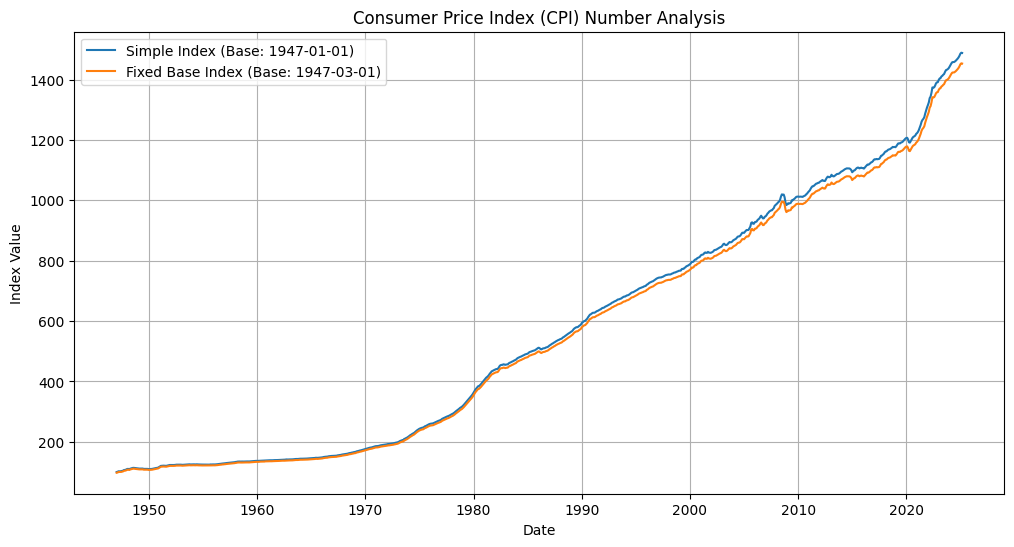


Consumer Price Index (CPI) Number Analysis:
                  CPI_Value  Simple_Index  Fixed_Base_Index
observation_date                                           
1947-01-01            21.48    100.000000         97.636364
1947-02-01            21.62    100.651769         98.272727
1947-03-01            22.00    102.420857        100.000000
1947-04-01            22.00    102.420857        100.000000
1947-05-01            21.95    102.188082         99.772727

Remember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for index number analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your CPI CSV file
file_path = 'C:/Users/USER/Downloads/CPIAUCSL.csv'  # Make sure this is the correct path

try:
    # Load the CPI data, parsing the 'observation_date' column and setting it as index
    df = pd.read_csv(file_path, parse_dates=['observation_date'], index_col='observation_date')

    # Check if the 'CPIAUCSL' column exists (adjust if your column name is different)
    cpi_column_name = 'CPIAUCSL'
    if cpi_column_name in df.columns:
        df_index = df[[cpi_column_name]].dropna()
        df_index.rename(columns={cpi_column_name: 'CPI_Value'}, inplace=True)
    else:
        raise ValueError(f"The CSV file does not contain a '{cpi_column_name}' column. Please check the file.")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the CPI data is in your Downloads folder.")
    exit()
except ValueError as e:
    print(f"Error: {e}")
    exit()
except Exception as e:
    print(f"An unexpected error occurred while reading the CSV file: {e}")
    exit()

# Enable showing all rows and columns (optional)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the CPI Data:")
print(df_index.head())

# 1. Simple Index Number (using the first period as the base)
base_value = df_index['CPI_Value'].iloc[0]
df_index['Simple_Index'] = (df_index['CPI_Value'] / base_value) * 100

# 2. Fixed Base Index Number (using a specific date as the base)
base_date = pd.to_datetime('1947-03-01')
if base_date in df_index.index:
    fixed_base_value = df_index.loc[base_date, 'CPI_Value']
    df_index['Fixed_Base_Index'] = (df_index['CPI_Value'] / fixed_base_value) * 100
else:
    print(f"Warning: The base date '{base_date}' was not found in the dataset.")
    df_index['Fixed_Base_Index'] = None

# 3. Visualization of Index Numbers
plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index['Simple_Index'], label='Simple Index (Base: 1947-01-01)')
if 'Fixed_Base_Index' in df_index.columns and df_index['Fixed_Base_Index'].notna().any():
    plt.plot(df_index.index, df_index['Fixed_Base_Index'], label=f'Fixed Base Index (Base: {base_date.strftime("%Y-%m-%d")})')
plt.title('Consumer Price Index (CPI) Number Analysis')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.show()

print("\nConsumer Price Index (CPI) Number Analysis:")
print(df_index.head())

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for index number analysis.")